**Deep Learning for feature dimension**

In this tutorial, you will learn how we can create new features from full data with the help of deep learning methods specifically using the `autoencoder` and `decoder` .

Usually, this is useful when we have large no. of features, epsecially when we want to integrate multiomics data, i.e. RNA, miRNA, methylation, etc. (e.g. https://clincancerres.aacrjournals.org/content/24/6/1248, https://www.frontiersin.org/articles/10.3389/fgene.2018.00477/full, https://www.biorxiv.org/content/10.1101/2021.03.03.433841v2.abstract)

Here, we are taking 1627 features including both miRNA and Protein coding genes of TCGA-liver cancer patients to demonstrate how you can perform feature reduction using Deep learning methods. In this exercise, we will create 50 features miRNA and RNA data of TCGA-liver cancer patients to demonstrate how you can perform feature reduction using Deep learning methods. In this exercise, we will create 50 features

Load packages

In [ ]:
import pandas as pd
import sys
import csv
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Input,Dropout
from keras.models import Model
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier as ANN

Load training and test data

In [ ]:
# INPUT NORMALIZED DATASET WITH ONLY 'ID' COLUMN and features COLUMN
#Load data from github
url1 = 'https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/train_data.txt'
train = pd.read_table(url1)

url2 = 'https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/test_data.txt'
test = pd.read_table(url2)


Print Train and test data

In [ ]:
train

,id,hsa_mir_107,hsa_mir_1225,hsa_mir_125b.1,hsa_mir_1271,hsa_mir_137,hsa_mir_139,hsa_mir_149,hsa_mir_150,hsa_mir_152,hsa_mir_1914,hsa_mir_1915,hsa_mir_210,hsa_mir_212,hsa_mir_215,hsa_mir_22,hsa_mir_25,hsa_mir_3074,hsa_mir_3145,hsa_mir_3170,hsa_mir_3176,hsa_mir_320d.2,hsa_mir_320e,hsa_mir_339,hsa_mir_3620,hsa_mir_3622a,hsa_mir_3662,hsa_mir_3677,hsa_mir_3681,hsa_mir_376c,hsa_mir_3911,hsa_mir_3936,hsa_mir_3941,hsa_mir_3943,hsa_mir_4286,hsa_mir_4427,hsa_mir_4510,hsa_mir_4667,hsa_mir_4677,hsa_mir_4732,...,ZNF343,ZNF398,ZNF408,ZNF433,ZNF461,ZNF485,ZNF487,ZNF493,ZNF500,ZNF521,ZNF597,ZNF600,ZNF607,ZNF623,ZNF662,ZNF668,ZNF669,ZNF670,ZNF670.1,ZNF675,ZNF691,ZNF705A,ZNF709,ZNF709.1,ZNF736,ZNF746,ZNF764,ZNF765,ZNF775,ZNF777,ZNF785,ZNF788,ZNF8,ZNF836,ZNF84,ZNF853,ZNF891,ZP1,ZP3,ZSCAN9
0,TCGA-DD-AACA,0.536360,0.0,0.640291,0.467640,0.000000,0.652035,0.328277,0.244427,0.880648,0.000000,0.000000,0.396641,0.439681,0.415694,0.356294,0.699024,0.325710,0.000000,0.702078,0.170954,0.157849,0.000000,0.000000,0.000000,0.000000,0.346621,0.571765,0.080447,0.120070,0.000000,0.000000,0.104264,0.0,0.257586,0.0,0.327132,0.000000,0.722097,0.106506,...,0.398417,1.000000,0.687390,0.652000,0.503982,0.196964,0.710872,0.777706,0.456485,0.777603,0.776327,0.659625,0.592138,0.787227,0.678766,0.955434,0.630447,0.755421,0.755421,0.658692,0.697720,0.000000,0.795788,0.795788,0.523559,0.631544,0.512036,0.786181,0.960621,0.889603,0.510361,0.904624,0.758988,0.456828,0.187634,0.623492,0.759754,0.000000,0.855066,0.457845
1,TCGA-ZS-A9CG,0.721645,0.0,0.914832,0.250453,0.000000,0.756713,0.593214,0.352604,0.751974,0.275440,0.000000,0.365227,0.432107,0.474366,0.697188,0.391892,0.224630,0.544166,0.253155,0.000000,0.000000,0.000000,0.379792,0.000000,0.000000,0.000000,0.444295,0.095989,0.174320,0.236391,0.000000,0.230081,0.0,0.120479,0.0,0.308239,0.000000,0.485696,0.218255,...,0.457078,0.721734,0.760365,0.627196,0.475247,0.289495,0.667570,0.694386,0.390702,0.736506,0.724666,0.585749,0.492529,0.797636,0.603029,0.948305,0.507633,0.507551,0.507551,0.503697,0.893449,0.000000,0.828712,0.828712,0.412575,0.462698,0.270532,0.649497,0.788613,0.765529,0.484238,0.661404,0.715211,0.405025,0.337437,0.399923,0.764550,0.000000,0.782095,0.313778
2,TCGA-ZS-A9CD,0.493477,0.0,0.721974,0.540088,0.148985,0.542105,0.627047,0.531698,0.713206,0.000000,0.094400,0.327706,0.609054,0.598778,0.507359,0.246830,0.164240,0.320349,0.318299,0.000000,0.000000,0.000000,0.434534,0.000000,0.143571,0.050827,0.449909,0.000000,0.313443,0.000000,0.114724,0.080842,0.0,0.355848,0.0,0.360867,0.000000,0.370815,0.044652,...,0.455217,0.197021,0.846728,0.691955,0.244728,0.276409,0.601888,0.400989,0.408032,0.765627,0.674600,0.490188,0.294519,0.779057,0.579488,0.956950,0.456951,0.321190,0.321190,0.468702,0.756942,0.000000,0.808425,0.808425,0.386483,0.680511,0.250712,0.522266,0.370563,0.811146,0.550733,0.695956,0.683392,0.211521,0.204840,0.654678,0.679134,0.675135,0.845510,0.409606
3,TCGA-ZP-A9D4,0.593125,0.0,0.807373,0.135391,0.000000,0.613164,0.024140,0.055172,0.803892,0.000000,0.000000,0.439985,0.216046,0.480845,0.415946,0.022546,0.040810,0.258379,0.220116,0.000000,0.000000,0.000000,0.001970,0.081077,0.000000,0.039684,0.137959,0.000000,0.114271,0.000000,0.000000,0.172107,0.0,0.060259,0.0,0.589314,0.000000,0.373978,0.066352,...,0.615724,0.333784,0.690582,0.723642,0.570280,0.302540,0.508588,0.861510,0.467603,0.682740,0.771822,0.665307,0.665010,0.795255,0.677320,0.960159,0.603653,0.783219,0.783219,0.674068,0.220734,0.954485,0.811598,0.811598,0.527439,0.795719,0.469337,0.709432,0.858508,0.849308,0.516074,0.710162,0.767924,0.433652,0.445360,0.331529,0.844824,0.772143,0.697840,0.512421
4,TCGA-ZP-A9D1,0.414785,0.0,0.597059,0.431546,0.038638,0.619589,0.417661,0.561736,0.691439,0.000000,0.000000,0.380385,0.644867,0.600597,0.649244,0.340362,0.078109,0.000000,0.101172,0.000000,0.127522,0.198914,0.383919,0.108197,0.000000,0.177517,0.292503,0.000000,0.235223,0.000000,0.000000,0.157918,0.0,0.080416,0.0,0.152892,0.000000,0.330951,0.046525,...,0.3

In [ ]:
test

,id,hsa_mir_107,hsa_mir_1225,hsa_mir_125b.1,hsa_mir_1271,hsa_mir_137,hsa_mir_139,hsa_mir_149,hsa_mir_150,hsa_mir_152,hsa_mir_1914,hsa_mir_1915,hsa_mir_210,hsa_mir_212,hsa_mir_215,hsa_mir_22,hsa_mir_25,hsa_mir_3074,hsa_mir_3145,hsa_mir_3170,hsa_mir_3176,hsa_mir_320d.2,hsa_mir_320e,hsa_mir_339,hsa_mir_3620,hsa_mir_3622a,hsa_mir_3662,hsa_mir_3677,hsa_mir_3681,hsa_mir_376c,hsa_mir_3911,hsa_mir_3936,hsa_mir_3941,hsa_mir_3943,hsa_mir_4286,hsa_mir_4427,hsa_mir_4510,hsa_mir_4667,hsa_mir_4677,hsa_mir_4732,...,ZNF343,ZNF398,ZNF408,ZNF433,ZNF461,ZNF485,ZNF487,ZNF493,ZNF500,ZNF521,ZNF597,ZNF600,ZNF607,ZNF623,ZNF662,ZNF668,ZNF669,ZNF670,ZNF670.1,ZNF675,ZNF691,ZNF705A,ZNF709,ZNF709.1,ZNF736,ZNF746,ZNF764,ZNF765,ZNF775,ZNF777,ZNF785,ZNF788,ZNF8,ZNF836,ZNF84,ZNF853,ZNF891,ZP1,ZP3,ZSCAN9
0,TCGA-ZS-A9CF,0.534461,0.0,0.835300,0.505010,0.000000,0.534293,0.256742,0.423004,0.745062,0.000000,0.000000,0.461365,0.288726,0.651398,0.405351,0.404740,0.427230,0.000000,0.430077,0.000000,0.334629,0.196683,0.162872,0.106909,0.000000,0.000000,0.172435,0.342947,0.202058,0.000000,0.000000,0.221032,0.000000,0.000000,0.186445,0.270581,0.000000,0.500455,0.280237,...,0.648601,0.339739,0.092888,0.804074,0.611819,0.469216,0.447884,0.808616,0.787718,0.726781,0.886455,0.711483,0.702066,0.316689,0.627699,0.966677,0.851948,0.886775,0.886775,0.758871,0.799251,0.685284,0.947100,0.947100,0.688624,0.211421,0.693097,0.753576,-0.047407,0.744829,0.562566,0.903513,0.813149,0.348356,0.720709,0.501326,0.927659,0.827978,0.786933,0.792145
1,TCGA-ZS-A9CE,0.671573,0.0,0.770282,0.225123,0.000000,0.759449,0.471126,0.203685,0.674457,0.000000,0.130251,0.596748,0.162853,0.550628,0.490442,0.389503,0.177257,0.336293,0.228893,0.000000,0.168870,0.000000,0.364218,0.000000,0.000000,0.000000,0.363819,0.308074,0.232524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.747933,0.000000,0.354364,0.000000,...,0.416845,0.363675,0.670939,0.778893,0.478563,0.460107,0.776802,0.813541,0.497676,0.702069,0.756846,0.610062,0.706311,0.405470,0.597139,0.975772,0.713907,0.815899,0.815899,0.637456,0.796144,0.000000,0.781646,0.781646,0.558160,0.379755,0.366743,0.703712,0.720119,0.775083,0.517003,0.727918,0.776292,0.450356,0.240548,0.555972,0.788237,0.675910,0.870589,0.728732
2,TCGA-ZP-A9D2,0.489922,0.0,0.677347,0.394343,0.000000,0.532100,0.617602,0.470660,0.726709,0.110133,0.113194,0.493995,0.541345,0.271372,0.653821,0.366450,0.098439,0.164538,0.089703,0.000000,0.076391,0.000000,0.287246,0.124516,0.000000,0.236650,0.567740,0.000000,0.333229,0.262281,0.000000,0.096936,0.106484,0.092545,0.000000,0.527328,0.000000,0.601133,0.000000,...,0.740117,0.648184,0.858411,0.765370,0.887773,0.466498,0.752424,0.872149,0.738545,0.751606,1.146746,0.829409,0.430651,0.808747,0.559902,0.977262,0.947690,0.991648,0.991648,0.706798,0.824481,0.793383,0.871167,0.871167,0.593588,0.844389,0.608111,0.879720,0.317829,0.860885,0.581853,0.714393,0.777830,0.565675,0.871449,0.644267,0.837576,0.708192,0.858169,0.818910
3,TCGA-ZP-A9D0,0.230357,0.0,0.700090,0.504971,0.000000,0.707072,0.372722,0.348424,0.579868,0.000000,0.000000,0.353632,0.331892,0.806310,0.678172,0.341205,-0.016336,0.309453,0.000000,0.239797,0.221415,0.000000,0.340784,0.000000,0.000000,0.165563,0.356893,0.061015,0.237611,0.000000,0.000000,0.263334,0.555724,0.000000,0.000000,0.430557,0.000000,0.576698,0.199379,...,0.354233,0.395963,0.741621,0.202882,0.551483,0.429216,0.673278,0.736076,0.488944,0.802822,0.744155,0.669881,0.291882,0.596865,0.632450,0.967248,0.726923,0.435866,0.435866,0.379150,0.267089,0.705078,0.804416,0.804416,0.311997,0.700207,0.312049,0.666734,0.664604,0.820200,0.488600,0.638505,0.509009,0.379108,0.469791,0.659611,0.776857,0.667427,0.856838,0.307697
4,TCGA-XR-A8TG,0.580207,0.0,0.722170,0.388923,0.053523,0.365255,0.349911,0.396378,0.802775,0.000000,0.000000,0.559884,0.564337,0.352733,0.491099,0.418431,0.417891,0.000000,0.137128,0.000000,0.000000,0.000000,0.255201,0.000000,0.000000,0.073361,0.197023,0.048680,0.258116,0.000000,0.000000,0.297577,0.246240,0.000000,

Prepare training & test IDs

In [ ]:
train_id = train['id']
train_id=train_id.reset_index(drop=True)


test_id = test['id']
test_id=test_id.reset_index(drop=True)


**Split training data into 5 folds** 

Now, perform 5-fold cross-validation into 80:20 ratio.




In [ ]:
Xtrain,Xvalidation=train_test_split(train,train_size=0.8,random_state=42)

View sub-train fold data

In [ ]:
Xtrain

,id,hsa_mir_107,hsa_mir_1225,hsa_mir_125b.1,hsa_mir_1271,hsa_mir_137,hsa_mir_139,hsa_mir_149,hsa_mir_150,hsa_mir_152,hsa_mir_1914,hsa_mir_1915,hsa_mir_210,hsa_mir_212,hsa_mir_215,hsa_mir_22,hsa_mir_25,hsa_mir_3074,hsa_mir_3145,hsa_mir_3170,hsa_mir_3176,hsa_mir_320d.2,hsa_mir_320e,hsa_mir_339,hsa_mir_3620,hsa_mir_3622a,hsa_mir_3662,hsa_mir_3677,hsa_mir_3681,hsa_mir_376c,hsa_mir_3911,hsa_mir_3936,hsa_mir_3941,hsa_mir_3943,hsa_mir_4286,hsa_mir_4427,hsa_mir_4510,hsa_mir_4667,hsa_mir_4677,hsa_mir_4732,...,ZNF343,ZNF398,ZNF408,ZNF433,ZNF461,ZNF485,ZNF487,ZNF493,ZNF500,ZNF521,ZNF597,ZNF600,ZNF607,ZNF623,ZNF662,ZNF668,ZNF669,ZNF670,ZNF670.1,ZNF675,ZNF691,ZNF705A,ZNF709,ZNF709.1,ZNF736,ZNF746,ZNF764,ZNF765,ZNF775,ZNF777,ZNF785,ZNF788,ZNF8,ZNF836,ZNF84,ZNF853,ZNF891,ZP1,ZP3,ZSCAN9
210,TCGA-DD-A1EJ,0.348643,0.000000,0.109670,0.631385,0.147516,0.208494,0.378242,0.221904,0.544857,0.000000,0.375526,0.735162,0.562805,0.512294,0.193648,0.639875,0.288044,0.377913,0.797197,0.381336,0.000000,0.0,0.471315,0.512409,0.0,0.332276,0.869854,0.000000,0.572441,0.000000,0.000000,0.127683,0.000000,0.000000,0.000000,0.123619,0.00000,0.827274,0.000000,...,0.680982,0.271190,0.764837,0.685457,0.523048,0.401419,0.536081,0.803541,0.476532,0.665261,0.906442,0.695310,0.408989,0.615878,0.666116,0.955408,0.712005,0.859223,0.859223,0.687190,0.826828,0.000000,0.957899,0.957899,0.699214,0.483870,0.584729,0.875608,0.780426,0.805173,0.640603,0.888623,0.762648,0.486500,0.749988,0.724574,0.864806,0.804634,0.877908,0.418475
229,TCGA-CC-A9FS,0.786178,0.000000,0.673667,0.072000,0.000000,0.722262,0.455779,0.298838,0.772634,0.000000,0.000000,0.309636,0.452695,0.546462,0.360921,0.486154,0.331596,0.482853,0.230247,0.000000,0.000000,0.0,0.190892,0.000000,0.0,0.057544,0.226991,0.071228,0.247006,0.000000,0.000000,0.458253,0.000000,0.087379,0.000000,0.232887,0.00000,0.716271,0.226952,...,0.293142,0.637462,0.862149,0.803762,0.557313,0.432301,0.637143,0.787459,0.145373,0.717796,0.335630,0.680407,0.756462,0.899875,0.657392,0.944948,0.637911,0.589257,0.589257,0.609890,0.193029,0.000000,0.716042,0.716042,0.527536,0.485810,0.064506,0.711124,0.669890,0.891197,0.453170,0.809392,0.831924,0.453340,0.481308,0.745344,0.881982,0.806353,0.918689,0.550451
226,TCGA-CC-A9FW,0.620420,0.000000,0.604382,0.787962,0.000000,0.121832,0.796989,0.387408,0.594951,0.000000,0.254314,0.755314,0.343929,0.461948,0.563572,0.384049,0.224375,0.519663,0.321204,0.000000,0.329718,0.0,0.489312,0.000000,0.0,0.136928,0.502379,0.000000,0.091036,0.222717,0.000000,0.302450,0.000000,0.000000,0.000000,0.000000,0.69502,0.541939,0.207937,...,0.783499,0.685296,0.754581,0.677520,0.580290,0.475242,0.716604,0.775828,0.482311,0.631227,0.277972,0.674974,0.665929,0.645592,0.413864,0.965959,0.552369,0.609117,0.609117,0.635750,0.762732,0.947960,0.901997,0.901997,0.544131,0.699371,0.570412,0.798889,0.851553,0.874744,0.468007,0.700389,0.789433,0.475153,0.477638,0.623341,0.861609,0.765680,0.888692,0.726010
73,TCGA-G3-A5SJ,0.000000,0.000000,0.399392,0.423973,0.420607,0.279485,0.493437,0.540635,0.244771,0.179259,0.000000,0.671846,0.476538,0.285935,0.144288,0.538782,0.418235,0.000000,0.717269,0.134661,0.000000,0.0,0.476902,0.105496,0.0,0.468662,0.287711,0.034264,0.332971,0.000000,0.000000,0.218416,0.000000,0.078409,0.000000,0.149294,0.00000,0.416245,0.000000,...,0.279067,0.219340,0.564201,0.680340,0.553432,0.746895,0.901312,0.701762,0.375919,0.699143,0.795147,0.848536,0.629694,0.875854,0.558096,0.945670,0.615492,0.740922,0.740922,0.446119,0.898492,0.652717,0.900916,0.900916,0.538792,0.333112,0.463669,0.643600,0.319630,0.641772,0.636511,0.689868,0.734003,0.329107,0.455658,0.575614,0.753753,0.742281,0.939500,0.719596
25,TCGA-RC-A7SK,0.585803,0.000000,0.935674,0.612015,0.040442,0.640647,0.562684,0.284064,0.759188,0.192434,0.102952,0.533703,0.253536,0.580303,0.586254,0.601726,0.279054,0.000000,0.255675,0.000000,0.133477,0.0,0.403318,0.000000,0.0,0.250910,0.498232,0.097076,0.360195,0.000000,0.000000,0.164843,0.186058,0.000000,0.000000,0.473028,0.000

View validation data

In [ ]:
Xvalidation

,id,hsa_mir_107,hsa_mir_1225,hsa_mir_125b.1,hsa_mir_1271,hsa_mir_137,hsa_mir_139,hsa_mir_149,hsa_mir_150,hsa_mir_152,hsa_mir_1914,hsa_mir_1915,hsa_mir_210,hsa_mir_212,hsa_mir_215,hsa_mir_22,hsa_mir_25,hsa_mir_3074,hsa_mir_3145,hsa_mir_3170,hsa_mir_3176,hsa_mir_320d.2,hsa_mir_320e,hsa_mir_339,hsa_mir_3620,hsa_mir_3622a,hsa_mir_3662,hsa_mir_3677,hsa_mir_3681,hsa_mir_376c,hsa_mir_3911,hsa_mir_3936,hsa_mir_3941,hsa_mir_3943,hsa_mir_4286,hsa_mir_4427,hsa_mir_4510,hsa_mir_4667,hsa_mir_4677,hsa_mir_4732,...,ZNF343,ZNF398,ZNF408,ZNF433,ZNF461,ZNF485,ZNF487,ZNF493,ZNF500,ZNF521,ZNF597,ZNF600,ZNF607,ZNF623,ZNF662,ZNF668,ZNF669,ZNF670,ZNF670.1,ZNF675,ZNF691,ZNF705A,ZNF709,ZNF709.1,ZNF736,ZNF746,ZNF764,ZNF765,ZNF775,ZNF777,ZNF785,ZNF788,ZNF8,ZNF836,ZNF84,ZNF853,ZNF891,ZP1,ZP3,ZSCAN9
84,TCGA-G3-A25T,0.337925,0.382434,0.320715,0.254940,0.051406,0.399165,0.906106,0.324631,0.544671,0.128105,0.240776,0.602520,0.613930,0.500427,0.438730,0.421832,0.144129,0.000000,0.636681,0.338082,0.375704,0.073929,0.267714,0.000000,0.000000,0.156025,0.581147,0.000000,0.327675,0.000000,0.159037,0.206194,0.000000,0.000000,0.000000,0.108500,0.000000,0.583526,0.061899,...,0.312273,0.622029,0.859048,0.385711,0.581117,0.243174,0.898177,0.754076,0.810156,0.748760,0.667035,0.680251,0.886483,0.758255,0.482516,0.943605,0.623502,0.644445,0.644445,0.683260,0.752255,0.000000,0.873926,0.873926,0.415054,0.651030,0.652049,0.776880,0.944335,0.862588,0.318312,0.679865,0.738550,0.500956,0.763275,0.692145,0.621945,0.826680,0.968688,0.408360
260,TCGA-BC-A110,0.297676,0.000000,0.834616,0.624394,0.000000,0.718929,0.569807,0.554811,0.839151,0.000000,0.000000,0.214479,0.520485,0.448450,0.504628,0.373788,0.127424,0.000000,0.137056,0.000000,0.121492,0.000000,0.164980,0.000000,0.000000,0.000000,0.320866,0.076449,0.523218,0.077718,0.214104,0.116617,0.087555,0.258620,0.000000,0.562014,0.000000,0.334569,0.064412,...,0.289043,0.166497,0.739520,0.560444,0.331704,0.230235,0.643486,0.428549,0.253738,0.783208,0.700856,0.546512,0.170155,0.117264,0.665928,0.932919,0.699962,0.864323,0.864323,0.447663,0.659265,0.000000,0.617010,0.617010,0.193506,0.384166,0.050697,0.453958,0.165310,0.751744,0.369856,0.687923,0.665014,0.318432,0.180659,0.703846,0.625881,0.645724,0.850589,0.332294
45,TCGA-LG-A6GG,0.250696,0.000000,0.436230,0.264453,0.000000,0.526217,0.128569,0.100392,0.244244,0.000000,0.000000,0.639759,0.401149,0.388101,0.344687,0.633325,0.336156,0.225309,0.351670,0.000000,0.000000,0.000000,0.465176,0.000000,0.000000,0.284239,0.285753,0.000000,0.057710,0.000000,0.000000,0.452091,0.000000,0.000000,0.000000,0.000000,0.000000,0.705140,0.000000,...,0.371418,0.355277,0.846808,0.646467,0.541528,0.340049,0.577187,0.823932,0.394784,0.729112,0.693718,0.710773,0.602742,0.321168,0.522929,0.947268,0.858242,0.800708,0.800708,0.683325,0.815269,0.718019,0.000000,0.000000,0.604239,0.505088,0.673674,0.667224,0.808287,0.680657,0.579630,0.810963,0.757218,0.392604,0.245007,0.563325,0.741677,0.000000,0.863728,0.759592
176,TCGA-DD-AACB,0.693067,0.000000,0.444038,0.298646,0.083470,0.403020,0.564153,0.434580,0.624611,0.000000,0.000000,0.617429,0.485760,0.312025,0.513680,0.117596,0.287458,0.115138,0.277480,0.000000,0.000000,0.000000,0.145628,0.000000,0.323166,0.201703,0.446438,0.040876,0.726314,0.000000,0.000000,0.320816,0.000000,0.173726,0.000000,0.367551,0.000000,0.500768,0.177199,...,0.663147,0.343500,0.648914,0.538319,0.364262,0.453925,0.308524,0.658860,0.330879,0.585323,0.695685,0.669132,0.686383,0.836097,0.636711,0.942589,0.517059,0.688681,0.688681,0.608122,0.933566,0.750582,0.874975,0.874975,0.380387,0.659068,0.446975,0.531868,0.882534,0.662204,0.459999,0.731662,0.678540,0.308863,0.279776,0.672398,0.718129,0.000000,0.780958,0.734736
143,TCGA-DD-AADN,0.681714,0.000000,0.251653,0.086352,0.440208,0.100581,0.077359,0.484995,0.352866,0.000000,1.000000,0.620740,0.532363,0.504040,0.329338,0.494560,0.564326,0.000000,0.266166,0.000000,0.000000,0.000000,0.214379,0.362500,0.000000,0.387131,0.712832,0.045795,0.060882,0.000000,0.000

Drop id column from matrices 

In [ ]:
train.drop(['id'], axis=1, inplace=True)
Xtrain.drop(['id'], axis=1,inplace=True)
Xvalidation.drop(['id'], axis=1,inplace=True)
test.drop(['id'], axis=1,inplace=True)


view train

In [ ]:
train.head()

,hsa_mir_107,hsa_mir_1225,hsa_mir_125b.1,hsa_mir_1271,hsa_mir_137,hsa_mir_139,hsa_mir_149,hsa_mir_150,hsa_mir_152,hsa_mir_1914,hsa_mir_1915,hsa_mir_210,hsa_mir_212,hsa_mir_215,hsa_mir_22,hsa_mir_25,hsa_mir_3074,hsa_mir_3145,hsa_mir_3170,hsa_mir_3176,hsa_mir_320d.2,hsa_mir_320e,hsa_mir_339,hsa_mir_3620,hsa_mir_3622a,hsa_mir_3662,hsa_mir_3677,hsa_mir_3681,hsa_mir_376c,hsa_mir_3911,hsa_mir_3936,hsa_mir_3941,hsa_mir_3943,hsa_mir_4286,hsa_mir_4427,hsa_mir_4510,hsa_mir_4667,hsa_mir_4677,hsa_mir_4732,hsa_mir_4741,...,ZNF343,ZNF398,ZNF408,ZNF433,ZNF461,ZNF485,ZNF487,ZNF493,ZNF500,ZNF521,ZNF597,ZNF600,ZNF607,ZNF623,ZNF662,ZNF668,ZNF669,ZNF670,ZNF670.1,ZNF675,ZNF691,ZNF705A,ZNF709,ZNF709.1,ZNF736,ZNF746,ZNF764,ZNF765,ZNF775,ZNF777,ZNF785,ZNF788,ZNF8,ZNF836,ZNF84,ZNF853,ZNF891,ZP1,ZP3,ZSCAN9
0,0.536360,0.0,0.640291,0.467640,0.000000,0.652035,0.328277,0.244427,0.880648,0.00000,0.0000,0.396641,0.439681,0.415694,0.356294,0.699024,0.325710,0.000000,0.702078,0.170954,0.157849,0.000000,0.000000,0.000000,0.000000,0.346621,0.571765,0.080447,0.120070,0.000000,0.000000,0.104264,0.0,0.257586,0.0,0.327132,0.0,0.722097,0.106506,0.000000,...,0.398417,1.000000,0.687390,0.652000,0.503982,0.196964,0.710872,0.777706,0.456485,0.777603,0.776327,0.659625,0.592138,0.787227,0.678766,0.955434,0.630447,0.755421,0.755421,0.658692,0.697720,0.000000,0.795788,0.795788,0.523559,0.631544,0.512036,0.786181,0.960621,0.889603,0.510361,0.904624,0.758988,0.456828,0.187634,0.623492,0.759754,0.000000,0.855066,0.457845
1,0.721645,0.0,0.914832,0.250453,0.000000,0.756713,0.593214,0.352604,0.751974,0.27544,0.0000,0.365227,0.432107,0.474366,0.697188,0.391892,0.224630,0.544166,0.253155,0.000000,0.000000,0.000000,0.379792,0.000000,0.000000,0.000000,0.444295,0.095989,0.174320,0.236391,0.000000,0.230081,0.0,0.120479,0.0,0.308239,0.0,0.485696,0.218255,0.000000,...,0.457078,0.721734,0.760365,0.627196,0.475247,0.289495,0.667570,0.694386,0.390702,0.736506,0.724666,0.585749,0.492529,0.797636,0.603029,0.948305,0.507633,0.507551,0.507551,0.503697,0.893449,0.000000,0.828712,0.828712,0.412575,0.462698,0.270532,0.649497,0.788613,0.765529,0.484238,0.661404,0.715211,0.405025,0.337437,0.399923,0.764550,0.000000,0.782095,0.313778
2,0.493477,0.0,0.721974,0.540088,0.148985,0.542105,0.627047,0.531698,0.713206,0.00000,0.0944,0.327706,0.609054,0.598778,0.507359,0.246830,0.164240,0.320349,0.318299,0.000000,0.000000,0.000000,0.434534,0.000000,0.143571,0.050827,0.449909,0.000000,0.313443,0.000000,0.114724,0.080842,0.0,0.355848,0.0,0.360867,0.0,0.370815,0.044652,0.102988,...,0.455217,0.197021,0.846728,0.691955,0.244728,0.276409,0.601888,0.400989,0.408032,0.765627,0.674600,0.490188,0.294519,0.779057,0.579488,0.956950,0.456951,0.321190,0.321190,0.468702,0.756942,0.000000,0.808425,0.808425,0.386483,0.680511,0.250712,0.522266,0.370563,0.811146,0.550733,0.695956,0.683392,0.211521,0.204840,0.654678,0.679134,0.675135,0.845510,0.409606
3,0.593125,0.0,0.807373,0.135391,0.000000,0.613164,0.024140,0.055172,0.803892,0.00000,0.0000,0.439985,0.216046,0.480845,0.415946,0.022546,0.040810,0.258379,0.220116,0.000000,0.000000,0.000000,0.001970,0.081077,0.000000,0.039684,0.137959,0.000000,0.114271,0.000000,0.000000,0.172107,0.0,0.060259,0.0,0.589314,0.0,0.373978,0.066352,0.000000,...,0.615724,0.333784,0.690582,0.723642,0.570280,0.302540,0.508588,0.861510,0.467603,0.682740,0.771822,0.665307,0.665010,0.795255,0.677320,0.960159,0.603653,0.783219,0.783219,0.674068,0.220734,0.954485,0.811598,0.811598,0.527439,0.795719,0.469337,0.709432,0.858508,0.849308,0.516074,0.710162,0.767924,0.433652,0.445360,0.331529,0.844824,0.772143,0.697840,0.512421
4,0.414785,0.0,0.597059,0.431546,0.038638,0.619589,0.417661,0.561736,0.691439,0.00000,0.0000,0.380385,0.644867,0.600597,0.649244,0.340362,0.078109,0.000000,0.101172,0.000000,0.127522,0.198914,0.383919,0.108197,0.000000,0.177517,0.292503,0.000000,0.235223,0.000000,0.000000,0.157918,0.0,0.080416,0.0,0.152892,0.0,0.330951,0.046525,0.107307,...,0.377065,0.737183,0.594949,0.663907,0.526790,0.331004

View Xtrain

In [ ]:
Xtrain.head()

,hsa_mir_107,hsa_mir_1225,hsa_mir_125b.1,hsa_mir_1271,hsa_mir_137,hsa_mir_139,hsa_mir_149,hsa_mir_150,hsa_mir_152,hsa_mir_1914,hsa_mir_1915,hsa_mir_210,hsa_mir_212,hsa_mir_215,hsa_mir_22,hsa_mir_25,hsa_mir_3074,hsa_mir_3145,hsa_mir_3170,hsa_mir_3176,hsa_mir_320d.2,hsa_mir_320e,hsa_mir_339,hsa_mir_3620,hsa_mir_3622a,hsa_mir_3662,hsa_mir_3677,hsa_mir_3681,hsa_mir_376c,hsa_mir_3911,hsa_mir_3936,hsa_mir_3941,hsa_mir_3943,hsa_mir_4286,hsa_mir_4427,hsa_mir_4510,hsa_mir_4667,hsa_mir_4677,hsa_mir_4732,hsa_mir_4741,...,ZNF343,ZNF398,ZNF408,ZNF433,ZNF461,ZNF485,ZNF487,ZNF493,ZNF500,ZNF521,ZNF597,ZNF600,ZNF607,ZNF623,ZNF662,ZNF668,ZNF669,ZNF670,ZNF670.1,ZNF675,ZNF691,ZNF705A,ZNF709,ZNF709.1,ZNF736,ZNF746,ZNF764,ZNF765,ZNF775,ZNF777,ZNF785,ZNF788,ZNF8,ZNF836,ZNF84,ZNF853,ZNF891,ZP1,ZP3,ZSCAN9
210,0.348643,0.0,0.109670,0.631385,0.147516,0.208494,0.378242,0.221904,0.544857,0.000000,0.375526,0.735162,0.562805,0.512294,0.193648,0.639875,0.288044,0.377913,0.797197,0.381336,0.000000,0.0,0.471315,0.512409,0.0,0.332276,0.869854,0.000000,0.572441,0.000000,0.0,0.127683,0.000000,0.000000,0.0,0.123619,0.00000,0.827274,0.000000,0.162661,...,0.680982,0.271190,0.764837,0.685457,0.523048,0.401419,0.536081,0.803541,0.476532,0.665261,0.906442,0.695310,0.408989,0.615878,0.666116,0.955408,0.712005,0.859223,0.859223,0.687190,0.826828,0.000000,0.957899,0.957899,0.699214,0.483870,0.584729,0.875608,0.780426,0.805173,0.640603,0.888623,0.762648,0.486500,0.749988,0.724574,0.864806,0.804634,0.877908,0.418475
229,0.786178,0.0,0.673667,0.072000,0.000000,0.722262,0.455779,0.298838,0.772634,0.000000,0.000000,0.309636,0.452695,0.546462,0.360921,0.486154,0.331596,0.482853,0.230247,0.000000,0.000000,0.0,0.190892,0.000000,0.0,0.057544,0.226991,0.071228,0.247006,0.000000,0.0,0.458253,0.000000,0.087379,0.0,0.232887,0.00000,0.716271,0.226952,0.116598,...,0.293142,0.637462,0.862149,0.803762,0.557313,0.432301,0.637143,0.787459,0.145373,0.717796,0.335630,0.680407,0.756462,0.899875,0.657392,0.944948,0.637911,0.589257,0.589257,0.609890,0.193029,0.000000,0.716042,0.716042,0.527536,0.485810,0.064506,0.711124,0.669890,0.891197,0.453170,0.809392,0.831924,0.453340,0.481308,0.745344,0.881982,0.806353,0.918689,0.550451
226,0.620420,0.0,0.604382,0.787962,0.000000,0.121832,0.796989,0.387408,0.594951,0.000000,0.254314,0.755314,0.343929,0.461948,0.563572,0.384049,0.224375,0.519663,0.321204,0.000000,0.329718,0.0,0.489312,0.000000,0.0,0.136928,0.502379,0.000000,0.091036,0.222717,0.0,0.302450,0.000000,0.000000,0.0,0.000000,0.69502,0.541939,0.207937,0.277450,...,0.783499,0.685296,0.754581,0.677520,0.580290,0.475242,0.716604,0.775828,0.482311,0.631227,0.277972,0.674974,0.665929,0.645592,0.413864,0.965959,0.552369,0.609117,0.609117,0.635750,0.762732,0.947960,0.901997,0.901997,0.544131,0.699371,0.570412,0.798889,0.851553,0.874744,0.468007,0.700389,0.789433,0.475153,0.477638,0.623341,0.861609,0.765680,0.888692,0.726010
73,0.000000,0.0,0.399392,0.423973,0.420607,0.279485,0.493437,0.540635,0.244771,0.179259,0.000000,0.671846,0.476538,0.285935,0.144288,0.538782,0.418235,0.000000,0.717269,0.134661,0.000000,0.0,0.476902,0.105496,0.0,0.468662,0.287711,0.034264,0.332971,0.000000,0.0,0.218416,0.000000,0.078409,0.0,0.149294,0.00000,0.416245,0.000000,0.000000,...,0.279067,0.219340,0.564201,0.680340,0.553432,0.746895,0.901312,0.701762,0.375919,0.699143,0.795147,0.848536,0.629694,0.875854,0.558096,0.945670,0.615492,0.740922,0.740922,0.446119,0.898492,0.652717,0.900916,0.900916,0.538792,0.333112,0.463669,0.643600,0.319630,0.641772,0.636511,0.689868,0.734003,0.329107,0.455658,0.575614,0.753753,0.742281,0.939500,0.719596
25,0.585803,0.0,0.935674,0.612015,0.040442,0.640647,0.562684,0.284064,0.759188,0.192434,0.102952,0.533703,0.253536,0.580303,0.586254,0.601726,0.279054,0.000000,0.255675,0.000000,0.133477,0.0,0.403318,0.000000,0.0,0.250910,0.498232,0.097076,0.360195,0.000000,0.0,0.164843,0.186058,0.000000,0.0,0.473028,0.00000,0.475110,0.048697,0.112317,...,0.280168,0.234401,0.746507,0.717954,0.443645,0.330434,0.8144

View test

In [ ]:
test.head()

,hsa_mir_107,hsa_mir_1225,hsa_mir_125b.1,hsa_mir_1271,hsa_mir_137,hsa_mir_139,hsa_mir_149,hsa_mir_150,hsa_mir_152,hsa_mir_1914,hsa_mir_1915,hsa_mir_210,hsa_mir_212,hsa_mir_215,hsa_mir_22,hsa_mir_25,hsa_mir_3074,hsa_mir_3145,hsa_mir_3170,hsa_mir_3176,hsa_mir_320d.2,hsa_mir_320e,hsa_mir_339,hsa_mir_3620,hsa_mir_3622a,hsa_mir_3662,hsa_mir_3677,hsa_mir_3681,hsa_mir_376c,hsa_mir_3911,hsa_mir_3936,hsa_mir_3941,hsa_mir_3943,hsa_mir_4286,hsa_mir_4427,hsa_mir_4510,hsa_mir_4667,hsa_mir_4677,hsa_mir_4732,hsa_mir_4741,...,ZNF343,ZNF398,ZNF408,ZNF433,ZNF461,ZNF485,ZNF487,ZNF493,ZNF500,ZNF521,ZNF597,ZNF600,ZNF607,ZNF623,ZNF662,ZNF668,ZNF669,ZNF670,ZNF670.1,ZNF675,ZNF691,ZNF705A,ZNF709,ZNF709.1,ZNF736,ZNF746,ZNF764,ZNF765,ZNF775,ZNF777,ZNF785,ZNF788,ZNF8,ZNF836,ZNF84,ZNF853,ZNF891,ZP1,ZP3,ZSCAN9
0,0.534461,0.0,0.835300,0.505010,0.000000,0.534293,0.256742,0.423004,0.745062,0.000000,0.000000,0.461365,0.288726,0.651398,0.405351,0.404740,0.427230,0.000000,0.430077,0.000000,0.334629,0.196683,0.162872,0.106909,0.0,0.000000,0.172435,0.342947,0.202058,0.000000,0.0,0.221032,0.000000,0.000000,0.186445,0.270581,0.000000,0.500455,0.280237,0.000000,...,0.648601,0.339739,0.092888,0.804074,0.611819,0.469216,0.447884,0.808616,0.787718,0.726781,0.886455,0.711483,0.702066,0.316689,0.627699,0.966677,0.851948,0.886775,0.886775,0.758871,0.799251,0.685284,0.947100,0.947100,0.688624,0.211421,0.693097,0.753576,-0.047407,0.744829,0.562566,0.903513,0.813149,0.348356,0.720709,0.501326,0.927659,0.827978,0.786933,0.792145
1,0.671573,0.0,0.770282,0.225123,0.000000,0.759449,0.471126,0.203685,0.674457,0.000000,0.130251,0.596748,0.162853,0.550628,0.490442,0.389503,0.177257,0.336293,0.228893,0.000000,0.168870,0.000000,0.364218,0.000000,0.0,0.000000,0.363819,0.308074,0.232524,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.747933,0.000000,0.354364,0.000000,0.000000,...,0.416845,0.363675,0.670939,0.778893,0.478563,0.460107,0.776802,0.813541,0.497676,0.702069,0.756846,0.610062,0.706311,0.405470,0.597139,0.975772,0.713907,0.815899,0.815899,0.637456,0.796144,0.000000,0.781646,0.781646,0.558160,0.379755,0.366743,0.703712,0.720119,0.775083,0.517003,0.727918,0.776292,0.450356,0.240548,0.555972,0.788237,0.675910,0.870589,0.728732
2,0.489922,0.0,0.677347,0.394343,0.000000,0.532100,0.617602,0.470660,0.726709,0.110133,0.113194,0.493995,0.541345,0.271372,0.653821,0.366450,0.098439,0.164538,0.089703,0.000000,0.076391,0.000000,0.287246,0.124516,0.0,0.236650,0.567740,0.000000,0.333229,0.262281,0.0,0.096936,0.106484,0.092545,0.000000,0.527328,0.000000,0.601133,0.000000,0.178373,...,0.740117,0.648184,0.858411,0.765370,0.887773,0.466498,0.752424,0.872149,0.738545,0.751606,1.146746,0.829409,0.430651,0.808747,0.559902,0.977262,0.947690,0.991648,0.991648,0.706798,0.824481,0.793383,0.871167,0.871167,0.593588,0.844389,0.608111,0.879720,0.317829,0.860885,0.581853,0.714393,0.777830,0.565675,0.871449,0.644267,0.837576,0.708192,0.858169,0.818910
3,0.230357,0.0,0.700090,0.504971,0.000000,0.707072,0.372722,0.348424,0.579868,0.000000,0.000000,0.353632,0.331892,0.806310,0.678172,0.341205,-0.016336,0.309453,0.000000,0.239797,0.221415,0.000000,0.340784,0.000000,0.0,0.165563,0.356893,0.061015,0.237611,0.000000,0.0,0.263334,0.555724,0.000000,0.000000,0.430557,0.000000,0.576698,0.199379,0.186315,...,0.354233,0.395963,0.741621,0.202882,0.551483,0.429216,0.673278,0.736076,0.488944,0.802822,0.744155,0.669881,0.291882,0.596865,0.632450,0.967248,0.726923,0.435866,0.435866,0.379150,0.267089,0.705078,0.804416,0.804416,0.311997,0.700207,0.312049,0.666734,0.664604,0.820200,0.488600,0.638505,0.509009,0.379108,0.469791,0.659611,0.776857,0.667427,0.856838,0.307697
4,0.580207,0.0,0.722170,0.388923,0.053523,0.365255,0.349911,0.396378,0.802775,0.000000,0.000000,0.559884,0.564337,0.352733,0.491099,0.418431,0.417891,0.000000,0.137128,0.000000,0.000000,0.000000,0.255201,0.000000,0.0,0.073361,0.197023,0.048680,0.258116,0.000000,0.0,0.297577,0.246240,0.000000,0.000000,0.207228,0.682084,0.510460,0.419470,0.000000,...,0.391328,0.

view Xvalidation

In [ ]:
Xvalidation.head()

,hsa_mir_107,hsa_mir_1225,hsa_mir_125b.1,hsa_mir_1271,hsa_mir_137,hsa_mir_139,hsa_mir_149,hsa_mir_150,hsa_mir_152,hsa_mir_1914,hsa_mir_1915,hsa_mir_210,hsa_mir_212,hsa_mir_215,hsa_mir_22,hsa_mir_25,hsa_mir_3074,hsa_mir_3145,hsa_mir_3170,hsa_mir_3176,hsa_mir_320d.2,hsa_mir_320e,hsa_mir_339,hsa_mir_3620,hsa_mir_3622a,hsa_mir_3662,hsa_mir_3677,hsa_mir_3681,hsa_mir_376c,hsa_mir_3911,hsa_mir_3936,hsa_mir_3941,hsa_mir_3943,hsa_mir_4286,hsa_mir_4427,hsa_mir_4510,hsa_mir_4667,hsa_mir_4677,hsa_mir_4732,hsa_mir_4741,...,ZNF343,ZNF398,ZNF408,ZNF433,ZNF461,ZNF485,ZNF487,ZNF493,ZNF500,ZNF521,ZNF597,ZNF600,ZNF607,ZNF623,ZNF662,ZNF668,ZNF669,ZNF670,ZNF670.1,ZNF675,ZNF691,ZNF705A,ZNF709,ZNF709.1,ZNF736,ZNF746,ZNF764,ZNF765,ZNF775,ZNF777,ZNF785,ZNF788,ZNF8,ZNF836,ZNF84,ZNF853,ZNF891,ZP1,ZP3,ZSCAN9
84,0.337925,0.382434,0.320715,0.254940,0.051406,0.399165,0.906106,0.324631,0.544671,0.128105,0.240776,0.602520,0.613930,0.500427,0.438730,0.421832,0.144129,0.000000,0.636681,0.338082,0.375704,0.073929,0.267714,0.0000,0.000000,0.156025,0.581147,0.000000,0.327675,0.000000,0.159037,0.206194,0.000000,0.000000,0.0,0.108500,0.0,0.583526,0.061899,0.000000,...,0.312273,0.622029,0.859048,0.385711,0.581117,0.243174,0.898177,0.754076,0.810156,0.748760,0.667035,0.680251,0.886483,0.758255,0.482516,0.943605,0.623502,0.644445,0.644445,0.683260,0.752255,0.000000,0.873926,0.873926,0.415054,0.651030,0.652049,0.776880,0.944335,0.862588,0.318312,0.679865,0.738550,0.500956,0.763275,0.692145,0.621945,0.826680,0.968688,0.408360
260,0.297676,0.000000,0.834616,0.624394,0.000000,0.718929,0.569807,0.554811,0.839151,0.000000,0.000000,0.214479,0.520485,0.448450,0.504628,0.373788,0.127424,0.000000,0.137056,0.000000,0.121492,0.000000,0.164980,0.0000,0.000000,0.000000,0.320866,0.076449,0.523218,0.077718,0.214104,0.116617,0.087555,0.258620,0.0,0.562014,0.0,0.334569,0.064412,0.233441,...,0.289043,0.166497,0.739520,0.560444,0.331704,0.230235,0.643486,0.428549,0.253738,0.783208,0.700856,0.546512,0.170155,0.117264,0.665928,0.932919,0.699962,0.864323,0.864323,0.447663,0.659265,0.000000,0.617010,0.617010,0.193506,0.384166,0.050697,0.453958,0.165310,0.751744,0.369856,0.687923,0.665014,0.318432,0.180659,0.703846,0.625881,0.645724,0.850589,0.332294
45,0.250696,0.000000,0.436230,0.264453,0.000000,0.526217,0.128569,0.100392,0.244244,0.000000,0.000000,0.639759,0.401149,0.388101,0.344687,0.633325,0.336156,0.225309,0.351670,0.000000,0.000000,0.000000,0.465176,0.0000,0.000000,0.284239,0.285753,0.000000,0.057710,0.000000,0.000000,0.452091,0.000000,0.000000,0.0,0.000000,0.0,0.705140,0.000000,0.000000,...,0.371418,0.355277,0.846808,0.646467,0.541528,0.340049,0.577187,0.823932,0.394784,0.729112,0.693718,0.710773,0.602742,0.321168,0.522929,0.947268,0.858242,0.800708,0.800708,0.683325,0.815269,0.718019,0.000000,0.000000,0.604239,0.505088,0.673674,0.667224,0.808287,0.680657,0.579630,0.810963,0.757218,0.392604,0.245007,0.563325,0.741677,0.000000,0.863728,0.759592
176,0.693067,0.000000,0.444038,0.298646,0.083470,0.403020,0.564153,0.434580,0.624611,0.000000,0.000000,0.617429,0.485760,0.312025,0.513680,0.117596,0.287458,0.115138,0.277480,0.000000,0.000000,0.000000,0.145628,0.0000,0.323166,0.201703,0.446438,0.040876,0.726314,0.000000,0.000000,0.320816,0.000000,0.173726,0.0,0.367551,0.0,0.500768,0.177199,0.124819,...,0.663147,0.343500,0.648914,0.538319,0.364262,0.453925,0.308524,0.658860,0.330879,0.585323,0.695685,0.669132,0.686383,0.836097,0.636711,0.942589,0.517059,0.688681,0.688681,0.608122,0.933566,0.750582,0.874975,0.874975,0.380387,0.659068,0.446975,0.531868,0.882534,0.662204,0.459999,0.731662,0.678540,0.308863,0.279776,0.672398,0.718129,0.000000,0.780958,0.734736
143,0.681714,0.000000,0.251653,0.086352,0.440208,0.100581,0.077359,0.484995,0.352866,0.000000,1.000000,0.620740,0.532363,0.504040,0.329338,0.494560,0.564326,0.000000,0.266166,0.000000,0.000000,0.000000,0.214379,0.3625,0.000000,0.387131,0.712832,0.045795,0.060882,0.000000,0.000000,0.415456,0.000000,0.000000,0.0,0.273225,0.0,0.547291,0.229473,0.8

**Dimensionality Reduction with Autoencoder**

Now, let’s see how we can start building a multi-layer perceptron. So, here, we can start by using the Keras Sequential model: it’s a linear stack of layers. Now, we can create the model by passing a list of layer instances to the constructor, which you set up by running model = Sequential().

Next,we need to decide the structure of the multi-layer perceptron. Here, we would have an input layer, some hidden layers and an output layer. Thus, during the development of the model, we need to consider the input shape should be clear for the first layer. The model needs to know what input shape to expect and that’s why you’ll always find the input_shape, input_dim, input_length, or batch_size arguments.

In this case, you will have to use a Dense layer, which is a fully connected layer. Dense layers implement the following operation: output = activation(dot(input, kernel) + bias). Note that without the activation function, the Dense layer would consist only of two linear operations: a dot product and an addition.

In the first layer, the activation argument takes the value relu. Next, we can see that the input_shape has been defined, which is total no. of features (in our case, genes and miRNAs). The model takes as input arrays of shape Input(shape = (ncol, )) . Next, you see that the first layer has ncol as a first value for the units argument of Dense(), which is the dimensionality of the output space and which are actually 500 and 100 hidden layers (hidden units). 

Finally, we defined bottleneck layers (output dimensions) encoding_dim, which is 50. This means that the model will output arrays of shape (50): this is is the dimensionality of the output space. 

**Decoded Layers**

The intermediate layer also uses the relu activation function. The output of this layer will be arrays of shape input dimensions. We are ending the network with a Dense layer of size 100, 500, ncol). The final layer will also use a sigmoid activation function so that your output is actually a probability.


In [ ]:
# USING FUNCTIONAL API MODEL

ncol = train.shape[1]

input_dim = Input(shape = (ncol, ))

encoding_dim = 50 #this can be changed if you want to create more features

encoded = Dense(500, activation = 'relu')(input_dim)
encoded = Dropout(0.5)(encoded) #DROUPOUT
encoded = Dense(100, activation = 'relu')(encoded)
encoded = Dense(encoding_dim, activation = 'relu')(encoded) # BOTTLENECK LAYER

# Decoder Layers
decoded = Dense(100, activation = 'relu')(encoded)
decoded = Dense(500, activation = 'relu')(decoded)
decoded = Dense(ncol, activation = 'sigmoid')(decoded)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded)

**Compile model : Fit the model**

Next, it’s time to compile our model and fit the model to the training data by using compile() and fit() functions. In compiling, you configure the model with the adam optimizer and the binary_crossentropy loss function. Additionally, we can an also monitor the accuracy during the training by passing ['accuracy'] to the metrics argument [Here, are skipping this step]. Eventually, we will have our output encoded dim (, which we defined 50)

In [ ]:
# Compile the Model
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
#autoencoder.fit(train, train, epochs = 20,verbose=1, batch_size = 32, shuffle = False, validation_data = (Xvalidation, Xvalidation))
autoencoder.fit(train, train, epochs = 20,verbose=1, batch_size = 32, shuffle = False, validation_data = (Xvalidation, Xvalidation))
encoder = Model(inputs = input_dim, outputs = encoded) #ASSIGN BOTTLENECK LAYER DATA AS OUTPUT
encoded_input = Input(shape = (encoding_dim, ))

Epoch 1/20
10/10 [==============================] - 2s 73ms/step - loss: 0.6542 - val_loss: 0.6185
Epoch 2/20
10/10 [==============================] - 0s 23ms/step - loss: 0.6164 - val_loss: 0.6131
Epoch 3/20
10/10 [==============================] - 0s 23ms/step - loss: 0.6116 - val_loss: 0.6120
Epoch 4/20
10/10 [==============================] - 0s 24ms/step - loss: 0.6104 - val_loss: 0.6115
Epoch 5/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6099 - val_loss: 0.6112
Epoch 6/20
10/10 [==============================] - 0s 23ms/step - loss: 0.6093 - val_loss: 0.6103
Epoch 7/20
10/10 [==============================] - 0s 24ms/step - loss: 0.6082 - val_loss: 0.6088
Epoch 8/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6055 - val_loss: 0.6012
Epoch 9/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6022 - val_loss: 0.5990
Epoch 10/20
10/10 [==============================] - 0s 24ms/step - loss: 0.6006 - val_loss: 0.5987
Epoch 11/


**Draw loss plot to understand the performance**

Draw a loss Plot for training and test data : Plot Loss vs Epoch

**Loss** is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. Thus, the goal of training a model is to find a set of weights and biases that have low loss, on average, across all examples.

**Epoch**

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

Now let's draw a plot Loss (Y-axis) vs Epoch (X-axis)

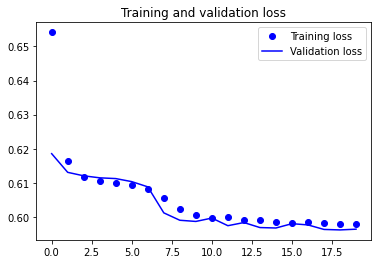

In [ ]:
# Loss and PLOT
loss = autoencoder.history.history['loss']
val_loss = autoencoder.history.history['val_loss']
epochs = range(20)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("train_test_loss.jpeg")

Prediction on training and test data


In [ ]:
# Prediction
encoded_train = pd.DataFrame(encoder.predict(train))
encoded_train = encoded_train.add_prefix('feature_')
encoded_test = pd.DataFrame(encoder.predict(test))
encoded_test = encoded_test.add_prefix('feature_')

print (encoded_train.shape)
print (encoded_test.shape)

train_out=pd.concat([train_id,encoded_train], axis=1)
test_out=pd.concat([test_id,encoded_test], axis=1)

(293, 50)
(74, 50)


View training data with new features

In [ ]:
train_out.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,TCGA-DD-AACA,1.864554,0.0,0.0,1.047398,0.0,0.0,2.021260,0.0,0.0,0.0,1.326661,0.000000,0.0,0.0,0.215257,1.254291,0.000000,4.261287,0.000000,1.252695,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.651578,0.456604,0.0,1.802928,1.238085,2.680259,0.952998,0.0,0.0,0.0,0.000000,0.0,0.000000,2.315910,0.0,0.0,4.343656,0.0,0.000000,0.0,0.000000,1.424557
1,TCGA-ZS-A9CG,0.000000,0.0,0.0,0.471560,0.0,0.0,0.692975,0.0,0.0,0.0,2.426706,0.000000,0.0,0.0,0.000000,4.559922,0.303713,3.320720,1.597751,0.000000,0.0,0.0,0.0,1.141692,0.0,0.0,0.0,0.0,1.235092,0.000000,0.0,2.972708,3.006659,3.797158,0.673606,0.0,0.0,0.0,0.949180,0.0,2.211866,0.209006,0.0,0.0,1.681819,0.0,1.405345,0.0,0.306896,1.820943
2,TCGA-ZS-A9CD,0.000000,0.0,0.0,0.698552,0.0,0.0,0.890660,0.0,0.0,0.0,2.091494,0.000000,0.0,0.0,0.000000,3.670456,0.026110,3.772126,1.093644,0.000000,0.0,0.0,0.0,0.423451,0.0,0.0,0.0,0.0,1.101782,0.000000,0.0,2.536873,2.808764,3.422310,0.764369,0.0,0.0,0.0,0.538615,0.0,1.345505,0.688234,0.0,0.0,2.360258,0.0,0.492589,0.0,0.091920,1.752511
3,TCGA-ZP-A9D4,0.972998,0.0,0.0,1.043112,0.0,0.0,1.576514,0.0,0.0,0.0,2.002717,0.046436,0.0,0.0,0.000000,2.622991,0.000000,4.093905,0.161585,0.080716,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.815661,0.000000,0.0,2.452994,2.260935,3.159155,0.671426,0.0,0.0,0.0,0.000000,0.0,0.534975,1.433077,0.0,0.0,3.460383,0.0,0.000000,0.0,0.000000,1.837707
4,TCGA-ZP-A9D1,0.636265,0.0,0.0,0.639175,0.0,0.0,1.716305,0.0,0.0,0.0,2.330157,0.000000,0.0,0.0,0.000000,3.588749,0.000000,4.352921,0.558863,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.812724,0.000000,0.0,2.789009,2.802284,3.268198,0.666628,0.0,0.0,0.0,0.000000,0.0,0.857012,1.133109,0.0,0.0,3.731070,0.0,0.000000,0.0,0.276183,1.767272


View Test data with new features

In [ ]:
test_out.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,TCGA-ZS-A9CF,1.957329,0.0,0.000000,1.081164,0.000000,0.0,2.066800,0.0,0.0,0.0,1.326880,0.000000,0.0,0.0,0.288034,1.120489,0.000000,4.370582,0.000000,1.266270,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.690344,0.535571,0.0,1.736874,1.345565,2.696482,1.114940,0.0,0.0,0.0,0.000000,0.0,0.000000,2.356292,0.0,0.0,4.560740,0.0,0.000000,0.0,0.000000,1.582589
1,TCGA-ZS-A9CE,0.544340,0.0,0.000000,1.173836,0.000000,0.0,1.237922,0.0,0.0,0.0,1.915672,0.139949,0.0,0.0,0.000000,2.809629,0.088689,3.837505,0.460851,0.000000,0.0,0.0,0.0,0.175512,0.0,0.0,0.0,0.0,0.834690,0.000000,0.0,2.506664,2.356471,3.321678,0.599881,0.0,0.0,0.0,0.056097,0.0,0.788893,1.142579,0.0,0.0,2.679774,0.0,0.000000,0.0,0.000000,1.974701
2,TCGA-ZP-A9D2,2.940339,0.0,0.388763,0.867801,0.274837,0.0,2.521037,0.0,0.0,0.0,1.189012,0.000000,0.0,0.0,1.778431,0.366469,0.000000,4.163618,0.000000,2.592401,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.212965,1.065440,0.0,1.368120,0.367532,2.110900,1.232126,0.0,0.0,0.0,0.000000,0.0,0.000000,2.902613,0.0,0.0,5.546096,0.0,0.000000,0.0,0.000000,1.145517
3,TCGA-ZP-A9D0,0.051721,0.0,0.000000,0.701844,0.000000,0.0,1.192376,0.0,0.0,0.0,2.280226,0.004372,0.0,0.0,0.000000,3.814553,0.000000,3.733310,0.988616,0.000000,0.0,0.0,0.0,0.563241,0.0,0.0,0.0,0.0,0.768038,0.000000,0.0,2.713548,2.900650,3.402013,0.658615,0.0,0.0,0.0,0.374508,0.0,1.327382,0.698235,0.0,0.0,2.722574,0.0,0.418742,0.0,0.328468,1.967471
4,TCGA-XR-A8TG,1.688460,0.0,0.000000,0.900657,0.000000,0.0,2.223944,0.0,0.0,0.0,1.659897,0.000000,0.0,0.0,0.000000,1.685981,0.000000,4.498857,0.000000,1.055798,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.685843,0.419946,0.0,2.123639,1.703784,2.858658,1.108073,0.0,0.0,0.0,0.000000,0.0,0.000000,2.180504,0.0,0.0,4.639697,0.0,0.000000,0.0,0.000000,1.617739


**Download output files**

After downloading training and test data which containing new features obtained from deep learning; we can use these new features for various purposes, i.e. classification or prognostic analysis.


In [ ]:
####### OUTPUT FEATURE EXTRACTED DATASET #########
from google.colab import files

train_out.to_csv('deep_train_mat.csv', index=False)
test_out.to_csv('deep_test_mat.csv', index=False)

**Assignment**

Create new 20 features for following data

Training Data: https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/train_data.txt


Test DataL https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/test_data.txt